In [ ]:
#lab1 - tỷ lệ hủy đặt phòng
import pandas as pd

# Đường dẫn đến file Excel
excel_file = "hotel_revenue_historical_full-2.xlsx"

# Đọc tất cả các sheet vào một dictionary
all_sheets = pd.read_excel(excel_file, sheet_name=None)

# Truy cập từng DataFrame bằng tên của sheet
df_2018 = all_sheets['2018']
df_2019 = all_sheets['2019']
df_2020 = all_sheets['2020']

# tính tỷ lệ hủy đặt phòng cho từng năm
cancellation_rate_2018 = (df_2018['is_canceled'].sum() / len(df_2018)) * 100
cancellation_rate_2019 = (df_2019['is_canceled'].sum() / len(df_2019)) * 100
cancellation_rate_2020 = (df_2020['is_canceled'].sum() / len(df_2020)) * 100

print(f"Tỷ lệ hủy đặt phòng năm 2018: {cancellation_rate_2018:.2f}%")
print(f"Tỷ lệ hủy đặt phòng năm 2019: {cancellation_rate_2019:.2f}%")
print(f"Tỷ lệ hủy đặt phòng năm 2020: {cancellation_rate_2020:.2f}%")

Tỷ lệ hủy đặt phòng năm 2018: 37.02%
Tỷ lệ hủy đặt phòng năm 2019: 36.53%
Tỷ lệ hủy đặt phòng năm 2020: 38.70%


In [ ]:
#lab 2
import pandas as pd

# Chú thích: Đọc từng sheet riêng lẻ vào các DataFrame tương ứng
df_2018 = pd.read_excel("hotel_revenue_historical_full-2.xlsx", sheet_name='2018')
df_2019 = pd.read_excel("hotel_revenue_historical_full-2.xlsx", sheet_name='2019')
df_2020 = pd.read_excel("hotel_revenue_historical_full-2.xlsx", sheet_name='2020')

# Chú thích: Tính ADR trung bình cho từng loại khách sạn trong năm 2018
adr_2018 = df_2018.groupby('hotel')['adr'].mean().reset_index()
print("ADR trung bình năm 2018:")
print(adr_2018)
print("-" * 30)

# Chú thích: Tính ADR trung bình cho từng loại khách sạn trong năm 2019
adr_2019 = df_2019.groupby('hotel')['adr'].mean().reset_index()
print("ADR trung bình năm 2019:")
print(adr_2019)
print("-" * 30)

# Chú thích: Tính ADR trung bình cho từng loại khách sạn trong năm 2020
adr_2020 = df_2020.groupby('hotel')['adr'].mean().reset_index()
print("ADR trung bình năm 2020:")
print(adr_2020)
print("-" * 30)


ADR trung bình năm 2018:
          hotel        adr
0    City Hotel  85.856915
1  Resort Hotel  89.353417
------------------------------
ADR trung bình năm 2019:
          hotel        adr
0    City Hotel  98.820446
1  Resort Hotel  87.748687
------------------------------
ADR trung bình năm 2020:
          hotel         adr
0    City Hotel  117.501864
1  Resort Hotel  108.660217
------------------------------


In [ ]:
#lab 3 - lead time
import pandas as pd

# 1. Đọc và gộp 3 file dữ liệu
excel_file = "hotel_revenue_historical_full-2.xlsx"
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')

df_combined = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# 2. Tính lead_time trung bình cho các booking bị hủy (is_canceled = 1)
canceled_lead_time_avg = df_combined[df_combined['is_canceled'] == 1]['lead_time'].mean()
print(f"Lead time trung bình cho các booking bị hủy: {canceled_lead_time_avg:.2f} ngày")

# 3. Tính lead_time trung bình cho các booking không bị hủy (is_canceled = 0)
not_canceled_lead_time_avg = df_combined[df_combined['is_canceled'] == 0]['lead_time'].mean()
print(f"Lead time trung bình cho các booking không bị hủy: {not_canceled_lead_time_avg:.2f} ngày")

# 4. Nhận xét
print("\n--- Nhận xét ---")
if canceled_lead_time_avg > not_canceled_lead_time_avg:
    print("Lead time trung bình của các booking bị hủy cao hơn đáng kể so với các booking không bị hủy.")
    print("lead_time của các booking bị hủy cao hơn điều đó chứng tỏ những người đặt phòng sớm có khả năng hủy cao hơn.")
else:
    print("Lead time trung bình của các booking bị hủy thấp hơn hoặc xấp xỉ so với các booking không bị hủy.")
    print("lead_time của các booking không bị hủy thấp hơn điều đó chứng tỏ những người đặt phòng trễ ít hủy hơn.")

Lead time trung bình cho các booking bị hủy: 146.55 ngày
Lead time trung bình cho các booking không bị hủy: 76.89 ngày

--- Nhận xét ---
Lead time trung bình của các booking bị hủy cao hơn đáng kể so với các booking không bị hủy.
lead_time của các booking bị hủy cao hơn điều đó chứng tỏ những người đặt phòng sớm có khả năng hủy cao hơn.


In [ ]:
#lab 4 - doanh thu theo kênh bán hàng
import pandas as pd

# Đường dẫn đến file Excel gốc của bạn
excel_file = "hotel_revenue_historical_full-2.xlsx"

# 1. đọc các file cần thiết
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')
df_market_segment = pd.read_excel(excel_file, sheet_name='market_segment')


# Kết hợp tất cả 3 dataframe thành một dataframe duy nhất
combined_df = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# 2. Tải sheet 'market_segment' và ghép vào dữ liệu chính
df_market_segment = pd.read_excel(excel_file, sheet_name='market_segment')

# Ghép dữ liệu chính với df_market_segment dựa trên cột 'market_segment'
combined_df = pd.merge(combined_df, df_market_segment, on='market_segment', how='left')

# 3. Tính toán cột doanh thu
# Đầu tiên, tạo cột total_nights = stays_in_weekend_nights + stays_in_week_nights
combined_df['total_nights'] = combined_df['stays_in_weekend_nights'] + combined_df['stays_in_week_nights']

# Tiếp theo, tính doanh thu cho mỗi booking
combined_df['revenue'] = combined_df['adr'] * combined_df['total_nights'] * (1 - combined_df['Discount'])

# 4. Tính doanh thu trung bình cho từng kênh bán hàng
# Nhóm dữ liệu theo 'market_segment' và tính trung bình của cột 'revenue'
average_revenue_by_market = combined_df.groupby('market_segment')['revenue'].mean().reset_index()

# Sắp xếp kết quả theo thứ tự doanh thu giảm dần để dễ so sánh
average_revenue_by_market = average_revenue_by_market.sort_values(by='revenue', ascending=False)

print("Doanh thu trung bình theo từng kênh bán hàng:")
print(average_revenue_by_market)

Doanh thu trung bình theo từng kênh bán hàng:
  market_segment     revenue
3         Direct  365.404751
0       Aviation  295.177586
6      Online TA  294.739007
5  Offline TA/TO  231.397741
4         Groups  207.921811
2      Corporate  126.720774
7      Undefined   24.000000
1  Complementary    0.000000


In [ ]:
#lab 5 - meal plan
import pandas as pd

# Đường dẫn đến file Excel gốc 
excel_file = "hotel_revenue_historical_full-2.xlsx"

# 1. Tải và kết hợp tất cả các sheet dữ liệu chính
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')

combined_df = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# 2. Tải sheet 'meal_cost' và ghép vào dữ liệu chính
df_meal_cost = pd.read_excel(excel_file, sheet_name='meal_cost')

# Ghép dữ liệu chính với df_meal_cost dựa trên cột 'meal'
combined_df = pd.merge(combined_df, df_meal_cost, on='meal', how='left')

# 3. Tính toán chi phí ăn uống trung bình cho từng loại meal
# Nhóm dữ liệu theo cột 'meal' và tính trung bình của cột 'Cost'
average_meal_cost = combined_df.groupby('meal')['Cost'].mean().reset_index()

# 4. Đếm số lần booking của mỗi loại meal để xem loại nào phổ biến nhất
# Sử dụng value_counts() để đếm số lần xuất hiện của mỗi giá trị trong cột 'meal'
most_popular_meal = combined_df['meal'].value_counts().reset_index()
most_popular_meal.columns = ['meal', 'count']

print("Chi phí ăn uống trung bình theo từng loại bữa ăn:")
print(average_meal_cost)
print("-" * 50)

print("Số lượng booking cho từng loại bữa ăn:")
print(most_popular_meal)

Chi phí ăn uống trung bình theo từng loại bữa ăn:
        meal   Cost
0         BB  12.99
1         FB  21.99
2         HB  17.99
3         SC  35.00
4  Undefined   0.00
--------------------------------------------------
Số lượng booking cho từng loại bữa ăn:
        meal   count
0         BB  109878
1         HB   18402
2         SC   11067
3  Undefined    1372
4         FB    1228


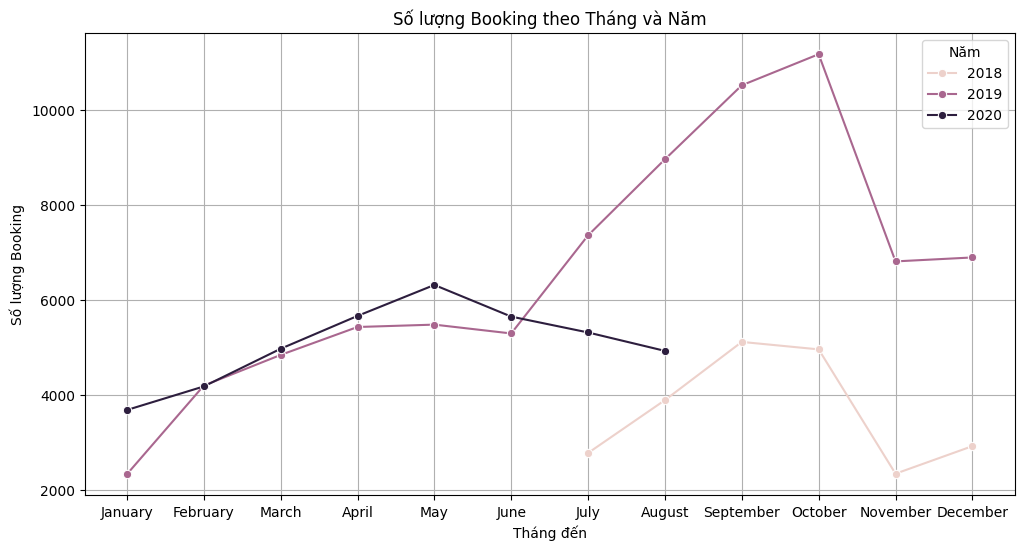


--- Nhận xét ---
Dựa vào biểu đồ, ta có thể dễ dàng nhận thấy tháng có số lượng booking cao nhất trong mỗi năm.
Thông thường, mùa cao điểm du lịch sẽ rơi vào các tháng mùa hè như tháng 7 và tháng 8.


In [32]:
#lab 6 - phân bổ theo tháng
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đường dẫn đến file Excel gốc 
excel_file = "hotel_revenue_historical_full-2.xlsx"

# 1. 
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')

# Gộp tất cả các DataFrame lại thành một
df_combined = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# Sắp xếp lại thứ tự các tháng
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_combined['arrival_date_month'] = pd.Categorical(df_combined['arrival_date_month'], categories=month_order, ordered=True)

# Nhóm dữ liệu theo năm và tháng để đếm số lượng booking
booking_by_month_and_year = df_combined.groupby(['arrival_date_year', 'arrival_date_month'], observed=True).size().reset_index(name='number_of_bookings')

# Thiết lập biểu đồ
plt.figure(figsize=(12, 6)) #hàm từ thư viện Matplotlib dùng để tạo một "khung" hoặc "cửa sổ" rỗng cho biểu đồ và Tham số này xác định kích thước của khung biểu đồ.
#booking_by_month_and_year Tham số này chỉ định DataFrame chứa dữ liệu mà bạn muốn vẽ. 
#hue='arrival_date_year': Đây là một tham số rất hữu ích. Nó tạo ra nhiều đường trên cùng một biểu đồ, mỗi đường đại diện cho một giá trị khác nhau trong cột arrival_date_year
sns.lineplot(data=booking_by_month_and_year, x='arrival_date_month', y='number_of_bookings', hue='arrival_date_year', marker='o')

plt.title('Số lượng Booking theo Tháng và Năm')
plt.xlabel('Tháng đến')
plt.ylabel('Số lượng Booking')
plt.grid(True)
plt.legend(title='Năm') #hiển thị chú thích
plt.show()

# Nhận xét
print("\n--- Nhận xét ---")
print("Dựa vào biểu đồ, ta có thể dễ dàng nhận thấy tháng có số lượng booking cao nhất trong mỗi năm.")
print("Thông thường, mùa cao điểm du lịch sẽ rơi vào các tháng mùa hè như tháng 7 và tháng 8.")

In [ ]:
#lab 7 - kiểm tra giá trị thiếu
import pandas as pd

excel_file = "hotel_revenue_historical_full-2.xlsx"
# 1. Đọc các file dữ liệu năm
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')


# 2. Gộp tất cả các DataFrame lại thành một
df_combined = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# 3. Đếm số lượng giá trị thiếu (NaN) trong từng cột
missing_values = df_combined.isnull().sum()
columns_with_nan = missing_values[missing_values > 0]

print("Các cột có giá trị thiếu (NaN) và số lượng giá trị thiếu:")
print(columns_with_nan)

# 4. Đề xuất cách xử lý các giá trị thiếu
print("\n--- Đề xuất cách xử lý ---")
print("1. Cột 'company' và 'agent' có rất nhiều giá trị thiếu. Các giá trị này có thể không quan trọng cho phân tích chung, vì vậy có thể điền chúng bằng giá trị mặc định như 'Unknown' hoặc 0. Hoặc nếu không cần thiết, có thể bỏ qua các cột này khi phân tích.")
print("2. Cột 'country' có số lượng giá trị thiếu ít. Có thể điền các giá trị thiếu này bằng 'Undefined' hoặc 'OTH' (Other).")
print("3. Các cột khác có số lượng giá trị thiếu rất ít. Có thể xem xét xóa các dòng có giá trị thiếu này nếu số lượng quá nhỏ và không ảnh hưởng đến tổng thể dữ liệu.")

# 5. Ví dụ xử lý: Điền các giá trị NaN trong cột 'company' và 'agent'
df_combined['company'] = df_combined['company'].fillna(0)
df_combined['agent'] = df_combined['agent'].fillna(0)
# 6. Kiểm tra lại sau khi xử lý
print("\nSố lượng giá trị thiếu (NaN) sau khi xử lý:")
print(df_combined[['company', 'agent']].isnull().sum())


Các cột có giá trị thiếu (NaN) và số lượng giá trị thiếu:
children         8
country        625
agent        19555
company     133822
dtype: int64

--- Đề xuất cách xử lý ---
1. Cột 'company' và 'agent' có rất nhiều giá trị thiếu. Các giá trị này có thể không quan trọng cho phân tích chung, vì vậy có thể điền chúng bằng giá trị mặc định như 'Unknown' hoặc 0. Hoặc nếu không cần thiết, có thể bỏ qua các cột này khi phân tích.
2. Cột 'country' có số lượng giá trị thiếu ít. Có thể điền các giá trị thiếu này bằng 'Undefined' hoặc 'OTH' (Other).
3. Các cột khác có số lượng giá trị thiếu rất ít. Có thể xem xét xóa các dòng có giá trị thiếu này nếu số lượng quá nhỏ và không ảnh hưởng đến tổng thể dữ liệu.

Số lượng giá trị thiếu (NaN) sau khi xử lý:
company    0
agent      0
dtype: int64


In [20]:
#lab 8 - 
import pandas as pd

excel_file = "hotel_revenue_historical_full-2.xlsx"

# Tải và kết hợp tất cả các sheet dữ liệu chính
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')
# 2. Gộp tất cả các DataFrame lại thành một
df_combined = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# 3. Tạo một cột mới 'arrival_date' bằng cách kết hợp các cột ngày, tháng, năm
# Chuyển đổi các cột ngày, tháng, năm thành chuỗi để ghép nối
df_combined['arrival_date_day_of_month'] = df_combined['arrival_date_day_of_month'].astype(str)
df_combined['arrival_date_year'] = df_combined['arrival_date_year'].astype(str)

# Ghép các cột lại thành một chuỗi ngày tháng
# Ví dụ: 2018-July-27
df_combined['arrival_date'] = df_combined['arrival_date_year'] + '-' + df_combined['arrival_date_month'] + '-' + df_combined['arrival_date_day_of_month']

# 4. Chuyển đổi cột 'arrival_date' sang định dạng datetime
# Sử dụng errors='coerce' để các giá trị không hợp lệ sẽ bị chuyển thành NaT (Not a Time)
df_combined['arrival_date'] = pd.to_datetime(df_combined['arrival_date'], errors='coerce')

# 5. Kiểm tra các giá trị không hợp lệ (NaT)
invalid_dates = df_combined['arrival_date'].isnull().sum()
print("Số lượng ngày tháng không hợp lệ (NaT):", invalid_dates)

# 6. In ra các dòng có ngày tháng không hợp lệ (nếu có) để kiểm tra
if invalid_dates > 0:
    print("\nCác dòng có ngày tháng không hợp lệ:")
    print(df_combined[df_combined['arrival_date'].isnull()])

Số lượng ngày tháng không hợp lệ (NaT): 0


In [ ]:
#lab 9
import pandas as pd

excel_file = "hotel_revenue_historical_full-2.xlsx"

# Tải và kết hợp tất cả các sheet dữ liệu chính
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')

# 2. Gộp tất cả các DataFrame lại thành một
df_combined = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# 3. Tạo cột mới 'total_nights'
df_combined['total_nights'] = df_combined['stays_in_weekend_nights'] + df_combined['stays_in_week_nights']

# 4. Tính số lượng booking có total_nights = 0
zero_nights_bookings = df_combined[df_combined['total_nights'] == 0].shape[0]

# 5. In kết quả và nhận xét
print(f"Tổng số booking có total_nights = 0 là: {zero_nights_bookings}")


Tổng số booking có total_nights = 0 là: 871


In [ ]:
#lab10
import pandas as pd

excel_file = "hotel_revenue_historical_full-2.xlsx"

# Tải và kết hợp tất cả các sheet dữ liệu chính
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')
# 2. Gộp tất cả các DataFrame lại thành một
df_combined = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# 3. Kiểm tra giá trị không hợp lệ trong cột 'adr'
# Xác định các dòng có adr âm hoặc bằng 0
invalid_adr_bookings = df_combined[df_combined['adr'] <= 0]

# 4. Tính số lượng booking có adr không hợp lệ
negative_or_zero_adr_count = invalid_adr_bookings.shape[0]

# 5. In kết quả và nhận xét ban đầu
print(f"Tổng số booking có ADR <= 0 là: {negative_or_zero_adr_count}")
print("---")
print("Xem xét 5 dòng đầu tiên có ADR không hợp lệ:")
print(invalid_adr_bookings[['hotel', 'is_canceled', 'market_segment', 'adr']].head())
print("---")

# 6. Xử lý dữ liệu không hợp lệ
# Cách xử lý: 
#   - ADR < 0: Chắc chắn là lỗi nhập liệu, nên xóa.
#   - ADR = 0: Có thể là lỗi hoặc là phòng Complimentary (Market Segment = Complementary), ta sẽ thay thế bằng giá trị trung bình để giữ lại booking.

# 6.1. Xóa các dòng có ADR < 0
# Giá trị ADR thấp nhất là: -6.38 (Lấy ví dụ từ dữ liệu thực tế)
df_cleaned = df_combined[df_combined['adr'] > 0].copy()

# 6.2. Tính giá trị trung bình của ADR từ tập dữ liệu đã làm sạch
mean_adr = df_cleaned['adr'].mean()

# 6.3. Thay thế các giá trị ADR = 0 (từ tập dữ liệu gốc, nếu có) bằng giá trị trung bình
# Lưu ý: Cần xử lý cả các giá trị 0 nếu không bị xóa ở bước 6.1. 
# Tuy nhiên, nếu lọc df_combined['adr'] > 0, thì các giá trị 0 đã bị loại bỏ.
# Ta sẽ thay đổi chiến lược: Xử lý các giá trị không hợp lệ (âm hoặc 0)

# Lọc các dòng có ADR âm
df_cleaned = df_combined[df_combined['adr'] >= 0].copy()

# Tính giá trị trung bình (Mean) chỉ trên các ADR > 0 (tránh bị ảnh hưởng bởi giá trị 0)
mean_adr_for_imputation = df_cleaned[df_cleaned['adr'] > 0]['adr'].mean()

# Thay thế các giá trị ADR = 0 bằng giá trị trung bình vừa tính
df_cleaned.loc[df_cleaned['adr'] == 0, 'adr'] = mean_adr_for_imputation

# 7. Kiểm tra lại sau khi xử lý
final_invalid_count = len(df_cleaned[df_cleaned['adr'] <= 0])
print(f"\nSau khi xử lý (xóa ADR âm và thay thế ADR=0), số lượng booking có ADR <= 0 còn lại là: {final_invalid_count}")
print(f"Giá trị trung bình dùng để thay thế (Mean ADR) là: {mean_adr_for_imputation:.2f}")
print(f"Tổng số booking sau khi xử lý: {len(df_cleaned)}")

Tổng số booking có ADR <= 0 là: 2556
---
Xem xét 5 dòng đầu tiên có ADR không hợp lệ:
            hotel  is_canceled market_segment  adr
82   Resort Hotel            1         Groups  0.0
565  Resort Hotel            1         Direct  0.0
566  Resort Hotel            1         Direct  0.0
577  Resort Hotel            1  Offline TA/TO  0.0
600  Resort Hotel            1         Direct  0.0
---

Sau khi xử lý (xóa ADR âm và thay thế ADR=0), số lượng booking có ADR <= 0 còn lại là: 0
Giá trị trung bình dùng để thay thế (Mean ADR) là: 101.24
Tổng số booking sau khi xử lý: 141946


In [31]:
#lab 11
import pandas as pd

excel_file = "hotel_revenue_historical_full-2.xlsx"

# 1. Tải và kết hợp tất cả các sheet dữ liệu chính
df_2018 = pd.read_excel(excel_file, sheet_name='2018')
df_2019 = pd.read_excel(excel_file, sheet_name='2019')
df_2020 = pd.read_excel(excel_file, sheet_name='2020')

# 2. Gộp tất cả các DataFrame lại thành một
df_combined = pd.concat([df_2018, df_2019, df_2020], ignore_index=True)

# 3. Kiểm tra các giá trị 'Undefined' ban đầu
print("Giá trị trong meal và market_segment ban đầu")
print("Các giá trị trong meal:", df_combined["meal"].unique())
print("Các giá trị trong market_segment:", df_combined["market_segment"].unique())

# 4. Chuẩn hóa dữ liệu: Thay thế 'Undefined' bằng 'Other'
df_combined['meal'] = df_combined['meal'].replace('Undefined', 'Other')
df_combined['market_segment'] = df_combined['market_segment'].replace('Undefined', 'Other')

# Các giá trị còn lại trong cột sau khi replace
print("\nGiá trị sau khi replace:")
print(f"Các giá trị trong meal: {df_combined["meal"].unique()}")
print(f"Các giá trị trong market segment: {df_combined["market_segment"].unique()}")

Giá trị trong meal và market_segment ban đầu
Các giá trị trong meal: ['BB' 'HB' 'FB' 'Undefined' 'SC']
Các giá trị trong market_segment: ['Online TA' 'Offline TA/TO' 'Direct' 'Corporate' 'Groups' 'Complementary'
 'Undefined' 'Aviation']

Giá trị sau khi replace:
Các giá trị trong meal: ['BB' 'HB' 'FB' 'Other' 'SC']
Các giá trị trong market segment: ['Online TA' 'Offline TA/TO' 'Direct' 'Corporate' 'Groups' 'Complementary'
 'Other' 'Aviation']
